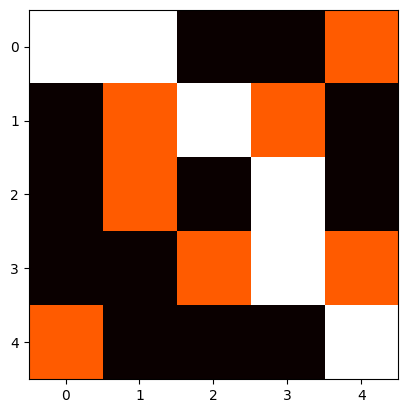

In [1]:
import math
import heapq
import matplotlib.pyplot as plt

# Define Manhattan and Euclidean heuristics
def manhattan_heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean_heuristic(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# A* algorithm implementation
def astar(grid, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start))  # (f, g, current_node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while open_list:
        current = heapq.heappop(open_list)[2]

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        # Explore neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:  # Add diagonals for Euclidean
            next_node = (current[0] + dx, current[1] + dy)
            if 0 <= next_node[0] < len(grid) and 0 <= next_node[1] < len(grid[0]) and grid[next_node[0]][next_node[1]] == 0:
                new_cost = cost_so_far[current] + 1  # Assume uniform cost of 1
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + heuristic(next_node, goal)
                    heapq.heappush(open_list, (priority, new_cost, next_node))
                    came_from[next_node] = current
    return None  # No path found

# BFS Implementation
def bfs(grid, start, goal):
    queue = [start]
    came_from = {start: None}
    while queue:
        current = queue.pop(0)
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            next_node = (current[0] + dx, current[1] + dy)
            if 0 <= next_node[0] < len(grid) and 0 <= next_node[1] < len(grid[0]) and grid[next_node[0]][next_node[1]] == 0:
                if next_node not in came_from:
                    queue.append(next_node)
                    came_from[next_node] = current
    return None

# Uniform Cost Search (UCS)
def ucs(grid, start, goal):
    open_list = []
    heapq.heappush(open_list, (0, start))  # (cost, current_node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while open_list:
        current = heapq.heappop(open_list)[1]

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            next_node = (current[0] + dx, current[1] + dy)
            if 0 <= next_node[0] < len(grid) and 0 <= next_node[1] < len(grid[0]) and grid[next_node[0]][next_node[1]] == 0:
                new_cost = cost_so_far[current] + 1
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    heapq.heappush(open_list, (new_cost, next_node))
                    came_from[next_node] = current
    return None

# Visualization function
def visualize_path(grid, path):
    for node in path:
        grid[node[0]][node[1]] = 2  # Mark path as 2
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.show()

# Example usage
grid = [
    [0, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

# Run A* with Manhattan heuristic
path = astar(grid, start, goal, manhattan_heuristic)
if path:
    visualize_path(grid, path)
else:
    print("No path found")